# MCS 275 Spring 2022 Worksheet 10 Solutions

* Course instructor: David Dumas
* Solutions prepared by: Jennifer Vaccaro, Johnny Joyce

## Topics

The main topics of this worksheet are:
* Pillow
* numpy

The problems are labeled according to which of these topics they cover.  Make sure to get some practice with each topic.

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Lecture 24](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture24.html)
* [Lecture 25](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture25.html)
* [Lecture 26](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture26.html)
* [Chapter 2 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)


### 1.  Made to order (Pillow and numpy)

#### A. Here is a 256x256 PNG image:

![colorful image](images/ws10prob1goal.png)

Make a Python script that uses Pillow to create an image that is identical to this one (or as close as you can get).  There are lots of ways to do this, and the problem is testing your ability to see a pattern in the image and express it in a Python program that uses the Pillow API.

#### B. Here is a 16x16 numpy matrix of integers (dtype int64):

```
array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [20, -1, 30, -1, 40, -1, 50, -1, 60, -1, 70, -1, 80, -1, 90, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [20, 10, 30, -1, 40, -1, 50, 10, 60, -1, 70, -1, 80, 10, 90, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [20, 10, 30, -1, 40, -1, 50, 10, 60, -1, 70, -1, 80, 10, 90, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [-1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [20, -1, 30, -1, 40, -1, 50, -1, 60, -1, 70, -1, 80, -1, 90, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])
```
Find a way to produce this matrix and store it in a variable named `A`. 

This is easy to do if you just copy the matrix into your source code.  But you can do it with much less code using `numpy` indexing.  (You'll want to examine the matrix carefully to spot all the patterns!) What's the shortest way to do it?  I was able to do it in 3 lines, 70 characters total, including newline characters (but not counting the line that imports `numpy`).  Can you do better?

# Solution

### A:

In [2]:
from PIL import Image

# Create a white image
img = Image.new("RGB",(8,8),(255,255,255))

for i in range(8):
    for j in range(8):
        # --- light blue ---
        # Occurs on main diagonal and when we are a multiple of 4px away from main diagonal
        if i%4 == j%4:
            img.putpixel((i,j),(0,255,255))
        # --- Magenta ---
        # Same as light blue, but shifted by 2 pixels
        if (i+2)%4 == j%4:
            img.putpixel((i,j),(255,0,255))
        # --- Dark blue ---
        # Similar to light blue, but reflected (hence `-1`)
        if i%4 == (-j-1)%4:
            img.putpixel((i,j),(0,0,255))

# Resize the image without smoothing between pixels
img = img.resize((255,255),Image.NEAREST)
img.save("images/worksheet10_q1a_soln2.png")

### B:

Solution in 3 lines:

In [10]:
import numpy as np

# First, fill up the matrix with `-1`
A = -1 * np.ones((16,16))

# Then the 10's appear in all rows except the first 4 and last 4 (hence `4:-4`)
# And they start in the second column (index 1) and appear in every third column (hence `1::3`) 
A[4:-4, 1::3] = 10

# np.arange(20,100,10) starts at 20 and goes to 100 with gaps of 10 between each number.
# We use this on every fourth row starting at row 1 (hence `1::4`) ...
# ... and on every second column (hence `::2`)
A[1::4, ::2] = np.arange(20, 100, 10)

print(A)


[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [20. -1. 30. -1. 40. -1. 50. -1. 60. -1. 70. -1. 80. -1. 90. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [20. 10. 30. -1. 40. -1. 50. 10. 60. -1. 70. -1. 80. 10. 90. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [20. 10. 30. -1. 40. -1. 50. 10. 60. -1. 70. -1. 80. 10. 90. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [-1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1. 10. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [20. -1. 30. -1. 40. -1. 50. -1. 60. -1. 70. -1. 80. -1. 90. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

## 2. Needle in a haystack, part 1 (Pillow)

Download and extract this zip file:
* [haystacks.zip](https://dumas.io/teaching/2022/spring/mcs275/data/haystacks.zip)

It contains 1024 image files in two directories (`haystack1` and `haystack2`).  If you look at them, they all appear to contain black and white "static".  These files are used in this problem and the next one.

Let's say that a pixel is **bluish** if its blue component is larger than its red or green components.  So, for example, (62,30,62) is not bluish, but (5,6,7) is bluish.

The files in directory `haystack1` are numbered `000` to `511`.  They are PNG image files, all of the same size.  Among all of these image files, there is only a single bluish pixel.  Which file is it in, and at what coordinates?

# Solution

In [1]:
from PIL import Image

for i in range(512):
    
    # Find filename corresponding to current value of i (`:03d` pads with zeros when needed)
    iname = "haystacks/haystack1/img{:03d}.png".format(i) # Open the image file
    img = Image.open(iname)
    w, h = img.size
    
    # Iterate over each pixel
    for x in range(w):
        for y in range(h):
            r,g,b = img.getpixel((x,y))
            if r<b and g<b: # If blue is the highest value
                print("Bluish pixel found at ({},{}) in file {}".format(x,y,iname))
                # There's only one bluish pixel, so now we are done
                exit()

Bluish pixel found at (20,22) in file haystacks/haystack1/img275.png


## 3. Needle in a haystack, part 2 (Pillow)

This is a more complex version of the previous problem.  Only work on it if you will still have enough time to do the numpy problems below.  (If unsure, skip ahead for now and come back to this later.)

The files in directory `haystack2` have 36-character filenames (plus an extension ".png"), and have varying sizes.  They contain a secret message, which you can decode as follows:

Examine all of the image files in alphabetical order.  In each one, look for bluish pixels.  There may be no bluish pixels at all, or a single one, or many of them.  Whenever a bluish pixel is found, let (x,y) be its position and let r be the remainder of dividing x+y by 36.  Take the character in the filename that appears at index r.  If that character is a digit, ignore it.  Otherwise, add that character to the end of the message.

*Hint: It may be helpful to use `os.listdir` from the `os` module.  It takes a directory name and returns a list of filenames in that directory.*

# Solution

In [1]:
import os
from PIL import Image

# Create empty string to store the secret message
message = ""
# Navigate to the correct directory
os.chdir("haystacks/haystack2/")

# Iterate through the pngs in the directory
for f in os.listdir():
    img = Image.open(f)
    w, h = img.size

    # Iterate through the pixels and check whether any is bluish
    for x in range(w):
        for y in range(h):
            r,g,b = img.getpixel((x,y))

            # If pixel is bluish, get the associated character.
            if r<b and g<b:
                remainder = (x+y) % 36
                # Only add to the message if the character isnt a digit
                if not f[remainder].isdigit():
                    message += f[remainder]
# Print out the secret message
print("Secret message!")
print(message)

Secret message!
rosebud


### 4. Max, Min, Mean and RMS (numpy)

Download and unzip this file to obtain a single CSV file:

* [widecsv.zip](https://dumas.io/teaching/2022/spring/mcs275/data/widecsv.zip)

It has no header row.  There are 30 rows of data, each of which has 10,000 fields which are floating-point numbers.

Read the file and put each line into a numpy vector. Then, compute the following four quantities related to the entries in that vector:
* The maximum of the entries
* The minimum of the entries
* The average (arithmetic mean) of the entries
* The square root of the sum of the squares of the entries (sometimes called the *norm* or the *$\ell^2$ norm*)

Write these rowwise summary statistics to an output CSV file that has the following header row:
```
max,min,mean,norm
```
which is then followed by 30 lines, one for each line in the input file.

Once you have a row of the input file converted to a numpy array, there shouldn't be any need for explicit iteration over its entries.  

#### IMPORTANT NOTES

Remember that the CSV module always gives you individual items from a row as strings, and so you'll need to convert them to floats.

Also, in our in-class use of the CSV module we used `csv.DictReader` to read data from CSV files, and that class requires a header row to be present.  For this problem you need to instead use `csv.reader`.  It operates similarly but returns a list for each row (rather than a dictionary).  Here's a sample of its use:

In [ ]:
import csv

with open("series.csv","r",encoding="UTF-8",newline="") as fp:
    rdr = csv.reader(fp)
    for row in rdr:
        print("Got a row with {} items in it.".format(len(row)))
        print("The item at index 8 in this row is:",row[8])

# Solution

In [3]:
import csv
import numpy as np

      
# Open the in_file and create a csv reader object
with open("series.csv", "rt", newline="") as fp:
    rdr = csv.reader(fp)
    
    # Create a file for the output and create a csv DictWriter object
    with open("summary.csv", "w", newline="") as fout:
        
        writer = csv.DictWriter(fout,fieldnames=["max","min","mean","norm"])
        writer.writeheader() # Use the given `fieldnames` for header row
        
        # Read through the input csv reader
        for row in rdr:
            
            # Convert to numpy array of floats
            v = np.array(row).astype(float)
            
            # Calculate all of the summary statistics and store in a dict
            d = {"max": np.max(v),
                 "min": np.min(v),
                 "mean": np.mean(v),
                 "norm": np.linalg.norm(v)}
            
            writer.writerow(d) # Write dict to output file


## 5. Impact crater (numpy)

Write a function `crater(n)` that takes a single argument, an integer `n`, and returns a numpy array of shape (n,n) whose entry at position (i,j) is equal to
$$ \sin \left ( \frac{\pi i}{n-1} \right ) \sin \left ( \frac{\pi j}{n-1} \right ) $$
unless that quantity is larger than 0.7, in which case the entry should instead have the value 0.

Use numpy arrays, and try to avoid loops.

**Hint: numpy as the constant $\pi$ built in as `np.pi`**

Here's an example of the expected result for n=8.

In [40]:
# The next line asks numpy to alter the way it prints arrays
# so only three decimal digits are shown, without scientific
# notation.  That will make the next test result easier to
# read.
np.set_printoptions(precision=3,suppress=True)

# Show the 8x8 return value
print(crater(8))

[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.188 0.339 0.423 0.423 0.339 0.188 0.   ]
 [0.    0.339 0.611 0.    0.    0.611 0.339 0.   ]
 [0.    0.423 0.    0.    0.    0.    0.423 0.   ]
 [0.    0.423 0.    0.    0.    0.    0.423 0.   ]
 [0.    0.339 0.611 0.    0.    0.611 0.339 0.   ]
 [0.    0.188 0.339 0.423 0.423 0.339 0.188 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]]


Also, can you explain the name of this problem?

# Solution

Code to produce a crater:

In [25]:
import numpy as np

def sinsin(n,i,j):
    """Calls the product sine function defined on the worksheet, 
    either on a scalar or on a numpy array
    n: the size of the crater
    i: the x coordinate(s)
    j: the y coordinate(s)"""
    return np.sin(np.pi*i/(n-1))*np.sin(np.pi*j/(n-1))

def crater(n):
    """Returns a crater numpy array of size n"""
    # Create an n-by-n numpy array of coordinates
    x = np.arange(0,n)
    y = np.arange(0,n)
    xx,yy = np.meshgrid(x,y)
    # Create a new numpy array which calls the function
    arr = sinsin(n,xx,yy)
    arr[arr>0.7] = 0 # Mask any values >0.7 with zeros
    return arr

# Make the crater numpy array print nicely
np.set_printoptions(precision=3,suppress=True)
print(crater(12))

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.079 0.152 0.213 0.256 0.279 0.279 0.256 0.213 0.152 0.079 0.   ]
 [0.    0.152 0.292 0.409 0.492 0.535 0.535 0.492 0.409 0.292 0.152 0.   ]
 [0.    0.213 0.409 0.571 0.687 0.    0.    0.687 0.571 0.409 0.213 0.   ]
 [0.    0.256 0.492 0.687 0.    0.    0.    0.    0.687 0.492 0.256 0.   ]
 [0.    0.279 0.535 0.    0.    0.    0.    0.    0.    0.535 0.279 0.   ]
 [0.    0.279 0.535 0.    0.    0.    0.    0.    0.    0.535 0.279 0.   ]
 [0.    0.256 0.492 0.687 0.    0.    0.    0.    0.687 0.492 0.256 0.   ]
 [0.    0.213 0.409 0.571 0.687 0.    0.    0.687 0.571 0.409 0.213 0.   ]
 [0.    0.152 0.292 0.409 0.492 0.535 0.535 0.492 0.409 0.292 0.152 0.   ]
 [0.    0.079 0.152 0.213 0.256 0.279 0.279 0.256 0.213 0.152 0.079 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


### Why is the problem called "impact crater"?

If we visualize the crater we produced using the following `PIL` code, we get an image of a crater!

The double sine function causes pixels nearer the center of the image to have a higher value, creating the light-colored pixels. When we eliminate all values greater than `0.7`, this blots out all pixels near the center, creating the black circle in the middle.

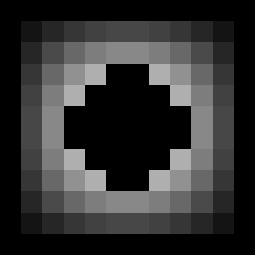

In [31]:
from PIL import Image

# Make a 50x50 crater.
# Multiply by 255 since `.fromarray` on the next line does not handle floats well
output_crater = crater(12) * 255

# "uint8" means "unsigned 8 bit integer" (i.e. an int between 0 and 255)
img_crater = Image.fromarray(output_crater.astype("uint8"))

# Resize to 255x255 and save
img_crater = img_crater.resize((255,255),Image.NEAREST)
img_crater.save("images/worksheet10_crater.png")

We can also produce larger craters to get a "smoother" looking image:

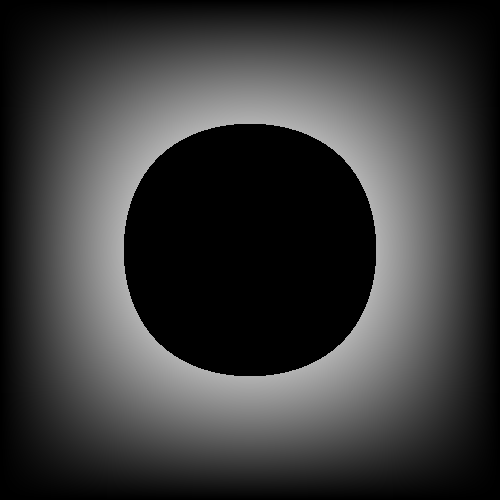

In [23]:
from PIL import Image

# Make a 500x500 crater.
# Multiply by 255 since `.fromarray` on the next line does not handle floats well
output_crater = crater(500) * 255


# "uint8" means "unsigned 8 bit integer" (i.e. an int between 0 and 255)
img_crater = Image.fromarray(output_crater.astype("uint8"))
img_crater.save("images/worksheet10_crater_highres.png")